In [1]:
import csv

In [2]:
with open("outputacm.txt",'r', newline='', encoding="utf8") as apfile:    
    count = 0
    author = set()
    venues = set()
    publications = set()
    citations = set()
    index = ""
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                 author.add(column.strip())
        elif row.startswith("#c"):
            venues.add(row)
        elif row.startswith("#%"):
            citations.add(index+row)
        elif row.startswith("#index"):
            index = row[7:]
            publications.add(row)
    # The total number contain the null author value as well!            
    print("Number of Authors" , len(author))
    print("Number of Venues" , len(venues))
    print("Number of References" , len(citations))
    print("Number of Publications" , len(publications))

Number of Authors 478463
Number of Venues 12610
Number of References 632634
Number of Publications 629814


In [3]:
author_publications = {}

# Considering each Citation as one
with open("outputacm.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                if author_publications.get(column.strip()) == None:
                    author_publications[column.strip()] = 1
                else:
                    author_publications[column.strip()]  += 1
                    
authors = list(author_publications.keys())
publications = list(author_publications.values())

In [4]:
null_index = authors.index("")
del authors[null_index]
del publications[null_index]

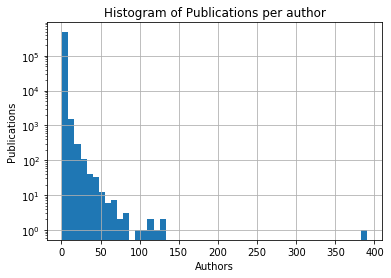

In [15]:
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Histogram of Publications per author')
plt.grid(True)

plt.hist(publications,bins=50,log=True)
plt.show()

In [6]:
ref = {}
cite = {}
cite_count_venue = {}
venue_publicationName = {}
# Creatig data structures used for 3.3 
with open("outputacm.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    venue = ""
    for row in apfile:        
        if row.startswith("#index"):                        
            index = int(row[6:])
        elif row.startswith("#c"):                        
            venue = row[2:]
            if venue_publicationName.get(index) == None:
                venue_publicationName[index] = venue
        elif row.startswith("#%"):
            if ref.get(index) == None:
                ref[index] = 1
            else:
                ref[index]  += 1
                
            if cite.get(int(row[3:])) == None:
                cite[int(row[3:])] = 1
            else:
                cite[int(row[3:])]  += 1                            
            
            cite_venue = venue_publicationName.get(int(row[3:]))
            if cite_count_venue.get(cite_venue) == None:
                cite_count_venue[cite_venue] = 1
            else:
                cite_count_venue[cite_venue] += 1
                    
print("Total references", len(ref))
print("Total cites", len(cite))

Total references 125372
Total cites 80172


In [7]:
print("Publication index with max References = " ,
      list(ref.keys())[list(ref.values()).index(max(list(ref.values())))] , "with value = ",max(list(ref.values())))
print("Publication index with max Citations = " ,
      list(cite.keys())[list(cite.values()).index(max(list(cite.values())))] , "with value = ",max(list(cite.values())))

Publication index with max References =  216749 with value =  195
Publication index with max Citations =  53387 with value =  817


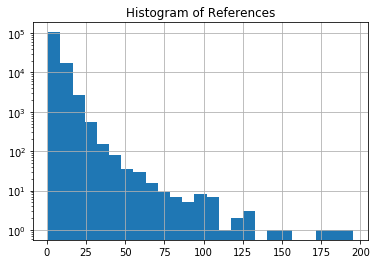

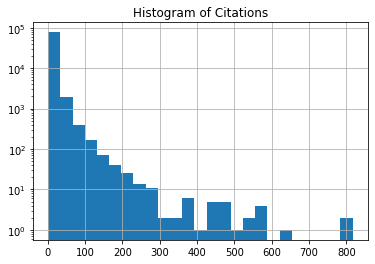

In [8]:
import matplotlib.pyplot as plt

plt.title('Histogram of References')
plt.grid(True)

plt.hist(list(ref.values()),bins=25,log=True)
plt.show()


plt.title('Histogram of Citations')
plt.grid(True)

plt.hist(list(cite.values()),bins=25,log=True)
plt.show()

In [9]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 12 23:42:27 2018

@author: yanghuiwang
"""

#%%
"""
• Clean the data
"""

import matplotlib.pyplot as plt
import networkx as nx
import re

with open("outputacm.txt","r") as f:
    data = f.read().split('\n\n')
n = len(data)-1
f.close()

In [10]:
# find all citation of each node and turn them into integers
citation = [list(map(int,re.findall(r'(?:#%)(\d+)',data[i]))) for i in range(n)]

In [11]:
#%%
"""
• Create nodes, edges, and bigragh G
"""

edgewhole=[(i,j) for i in range(n) for j in citation[i]]
node=range(n)
G=nx.DiGraph()
G.add_nodes_from(node)
G.add_edges_from(edgewhole)

(453387, 0.0002667540311108015)


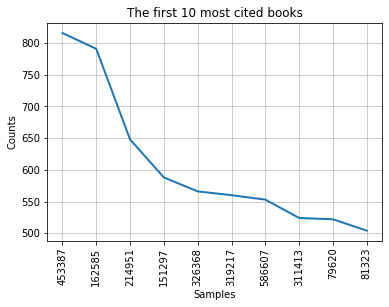

[453387, 246511, 586607, 81323, 79620, 214951, 326368, 162585, 311413, 517247, 455254, 178287, 327827, 231782, 151297, 144427, 319217, 616075, 250081, 162995] 20
442
+------+--------+---------------------------------------------------------------------------------+--------------------------------------------------------+------+------+-------+
| Rank | ID     | Title                                                                           | Author                                                 | Year | Cite | Cited |
+------+--------+---------------------------------------------------------------------------------+--------------------------------------------------------+------+------+-------+
| 1    | 453387 | Introduction to algorithms                                                      | Thomas T. Cormen,Charles E. Leiserson,Ronald L. Rivest | 1990 | 0    | 816   |
| 2    | 246511 | Simulation Modeling and Analysis, 2nd edition                                   | Averill M. Law,W. 

In [12]:
#%%
"""
• Use PageRank on the discovered network to rank the papers by importance.
"""

# pagerank 

pr=nx.pagerank(G,alpha=0.99)
mydic=dict(zip(node,citation))

# sort pagerank

from operator import itemgetter

sorted_pr = sorted(pr.items(), key=itemgetter(1)) # all nodes with weight
impnodes=sorted_pr[::-1] # all nodes with weight arranged descendingly 
print(impnodes[0]) # (453387, 0.0002667540311108015) the most important node and its weight
#%%

"""
• Display the ranking.
"""
 
# for distribution image

from nltk import FreqDist
fdist=FreqDist(citation[i][j] for i in range(n) for j in range(len(citation[i])))
fdist.plot(10, cumulative=False,title='The first 10 most cited books')
#%%

# for table ranking

m=20 # first 20 
implist = [impnodes[i][0] for i in range(m)] # the first 20 most important nodes
print(implist,len(implist)) # [453387, 246511, 586607, 81323, 79620, 214951, 326368, 162585, 311413, 517247, 455254, 178287, 327827, 231782, 151297, 144427, 319217, 616075, 250081, 162995] 20

list=[]
for i in range(m):
    list.append ([j for j in range(n) if implist[i] in citation[j]]) # find who cited the first 20 node and put in to a list of lists
print(len(list[1])) # 442 is the number of times the second most important node being cited

from prettytable import PrettyTable
title= [re.findall(r'(?:#\*)(.+)',data[implist[i]])[0] for i in range(m)]
author=[re.findall(r'(?:#@)(.+)',data[implist[i]])[0] for i in range(m)]
year=[int(re.findall(r'(?:#t)(.+)',data[implist[i]])[0]) for i in range(m)]
cite=[len(citation[implist[i]]) for i in range(20)]
cited=[len(list[i]) for i in range(20)]

x = PrettyTable()
x.add_column('Rank',range(1,21))
x.add_column('ID',implist)
x.add_column('Title',title)
x.add_column('Author',author)
x.add_column('Year',year)
x.add_column('Cite',cite)
x.add_column('Cited',cited)
x.align["Rank"]="l"
x.align["ID"]="l"
x.align["Title"]="l"
x.align["Author"]="l"
x.align["Year"]="l"
x.align["Cite"]="l"
x.align["Cited"]="l"
lines = x.get_string()
print(x)

In [13]:
with open('output.txt','w') as file:
    file.write(lines)
file.close()

816
33
37
8
8
0
no cited after the 6'th node
[453387, 616871, 241257, 106610, 430699, 142423] [0, 0, 0, 0, 0, 0]
[[(616871, 453387), (589364, 453387), (222838, 453387), (600460, 453387), (298465, 453387), (613003, 453387), (223071, 453387), (585934, 453387), (100909, 453387), (325429, 453387), (280723, 453387), (292142, 453387), (343587, 453387), (300633, 453387), (446103, 453387), (240509, 453387), (246168, 453387), (295045, 453387), (615625, 453387), (213123, 453387)], [(241257, 616871), (556580, 616871), (575149, 616871), (433547, 616871), (384627, 616871), (413803, 616871), (102270, 616871), (28074, 616871), (335852, 616871), (34175, 616871), (107247, 616871), (24899, 616871), (115674, 616871), (399456, 616871), (429745, 616871), (506215, 616871), (505221, 616871), (504166, 616871), (498123, 616871), (497006, 616871)], [(106610, 241257), (430699, 241257), (101144, 241257), (30461, 241257), (433547, 241257), (33383, 241257), (35431, 241257), (416763, 241257), (34076, 241257), (10227

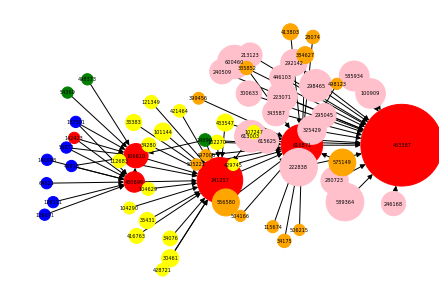

In [14]:
#%%
"""
• Graph drawing algorithm to create a visually pleasing picture of the most important papers/authors in your network, and come up with a nice way to display the ranking.
"""

def findnds(m):
    ndslist = []
    impndlist = [impnodes[0][0]]
    impnd=impnodes[0][0] #453387
    for i in range(m):
        nds=[j for j in range(n) if impnd in citation[j]] # find all nodes which cited the impnd
        ndslist.append(nds) # append the nodes
        print(len(nds)) # 816; 33; 37; 8 
        dic={} 
        for k in range(len(nds)):
            dic[nds[k]]=pr[nds[k]] # project the whole dataset into a smaller one with nodes which cited the impnd
        sorted_pr=sorted(dic.items(),key=itemgetter(1)) # rank them 
        if sorted_pr:
            std=sorted_pr[-1] # find the most important within the dict and its weight
            impnd = std[0]
            impndlist.append(impnd)
        else:
            print('no cited after the %d\'th node'%m)
    return ndslist,impndlist

#Visulization

nds_l, impnd_l = findnds(6)
ndshow = [0]*6
ndrank = [0]*6
for i in range(6):
    #if len(nds_l[i]) > 20: # if more than 20 nodes cited the node
    d1 = {}
    for k in range(len(nds_l[i])):
        d1[nds_l[i][k]]=pr[nds_l[i][k]] # project node and weight
    pr_s = sorted(d1.items(),key=itemgetter(1)) # sorted by weight
    pr_s = pr_s[:-21:-1] # return the first most important node to virtualize
    ndshow[i] = [pr_s[j][0] for j in range(len(pr_s))]
    ndrank[i] = [pr_s[j][1] for j in range(len(pr_s))]

center= impnd_l[0]
egshow =[0]*6

print(impnd_l, egshow)

for i,v in enumerate(impnd_l): # connect in between clusters
    egshow[i] = [(j, v) for j in ndshow[i]]
print(egshow)


nodelist=[i for j in range(6) for i in ndshow[j]] # 20+20+20+8+8

#%%

Graph=nx.DiGraph()
Graph.add_nodes_from(nodelist)
for i in range(6):
    Graph.add_edges_from(egshow[i]) 


rank_dict = {ndshow[i][j]:ndrank[i][j]*(10**8) for i in range(len(ndshow)) for j in range(len(ndshow[i]))}
rank_dict[center] = impnodes[0][1]*(10**8/4)

cluster_dict = {ndshow[i][j]:i for i in range(len(ndshow)) for j in range(len(ndshow[i]))}

for i,v in enumerate(impnd_l):
    cluster_dict[v] = 5 

#print cluster_dict

#set node attributes
nx.set_node_attributes(Graph,rank_dict,'rank')
nx.set_node_attributes(Graph,cluster_dict,'cluster')
print(Graph.nodes())


node_num = len(Graph.nodes())
colors = [0]*node_num
size = [0]*node_num
for i,n in enumerate(Graph.nodes()):
    if Graph.nodes[n]['cluster'] == 0:
        colors[i] = 'pink'
    elif Graph.nodes[n]['cluster'] == 1:
        colors[i] = 'orange'
    elif Graph.nodes[n]['cluster'] == 2:
        colors[i] = 'yellow'
    elif Graph.nodes[n]['cluster'] == 3:
        colors[i]='green'
    elif Graph.nodes[n]['cluster'] == 4:
        colors[i] ='blue'
    else:
        colors[i] ='red'

for i,n in enumerate(Graph.nodes()):
    size[i] = Graph.nodes[n]['rank']

nx.draw(Graph,node_color = colors, node_size = size, font_size = 5, with_labels = True)

plt.show()